<a href="https://colab.research.google.com/github/Vojaspy/Deep-Learning-Project/blob/master/Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from zipfile import ZipFile
from google.colab import drive
import cv2
import os

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
zip_ref =  ZipFile('/content/drive/MyDrive/Deep Learning Project Dataset/archive (5).zip', 'r')

  #extract in current directory
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
fpath = '/tmp/tea sickness dataset'

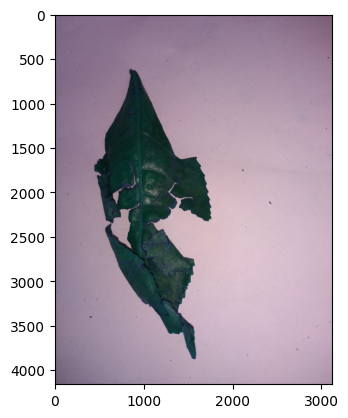

In [ ]:
for cpath in os.listdir(fpath):
  cpath = os.path.join(fpath,cpath)
  for imgpath in os.listdir(cpath):
    img = cv2.imread(os.path.join(cpath, imgpath))
    plt.imshow(img)
    break

In [ ]:
class_names = []
for x in os.walk(fpath):
    sub_dir = x[0]
    sub_dir_list = str(sub_dir).split('/')
    x_class = (sub_dir_list[-1])
    class_names.append(x_class)

print(class_names)

['tea sickness dataset', 'bird eye spot', 'algal leaf', 'white spot', 'Anthracnose', 'red leaf spot', 'brown blight', 'healthy', 'gray light']


# Displaying 5 images of healthy as well as each disease

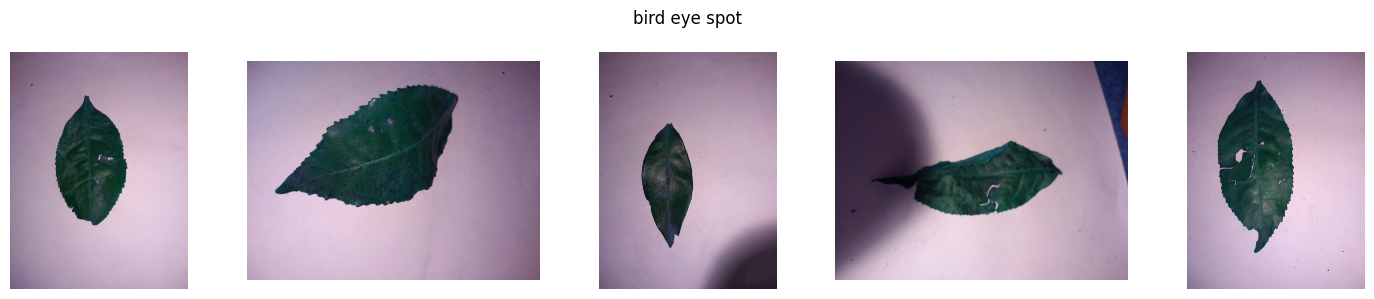

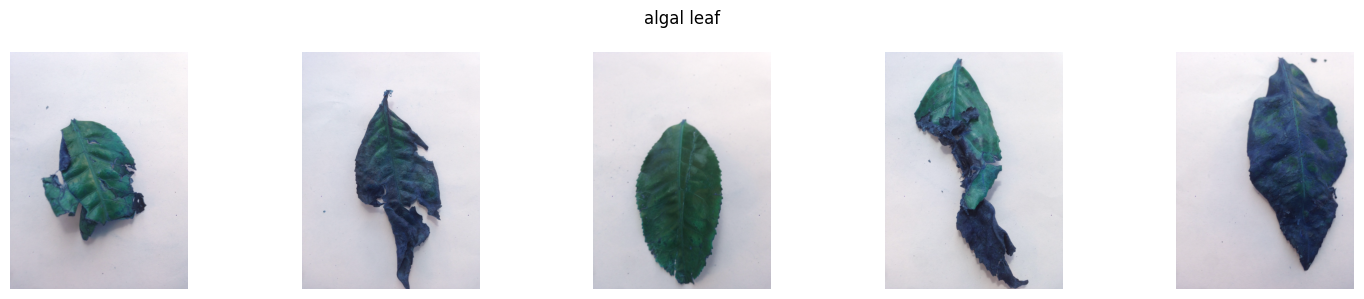

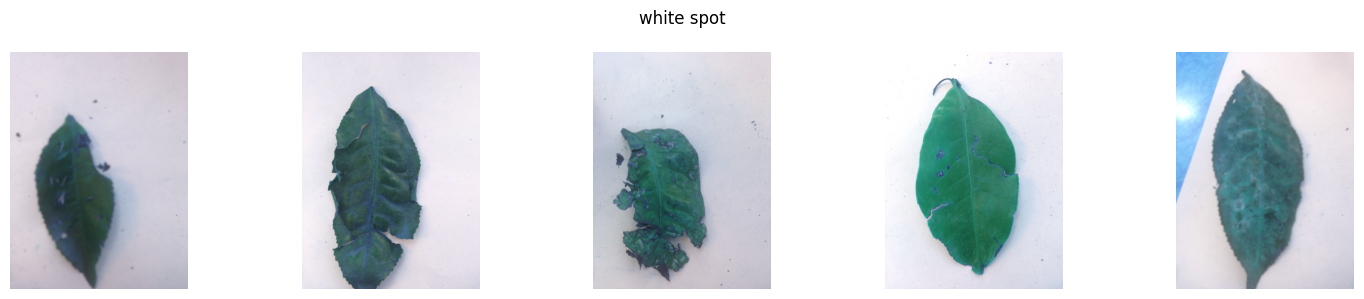

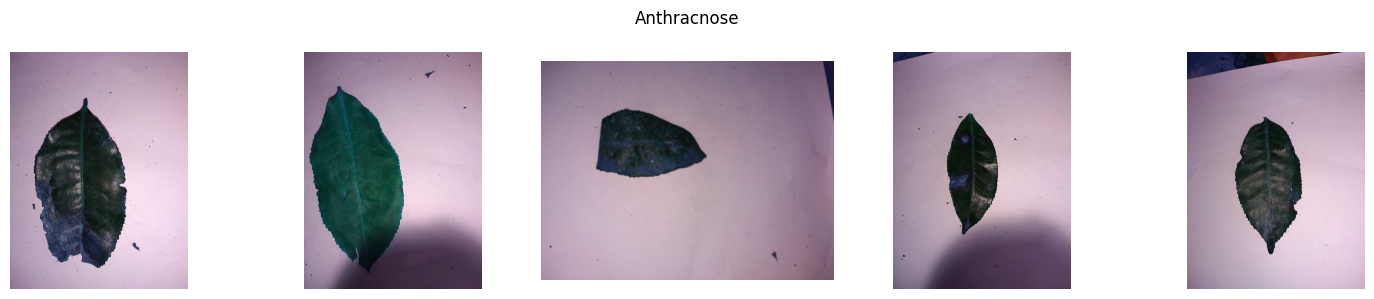

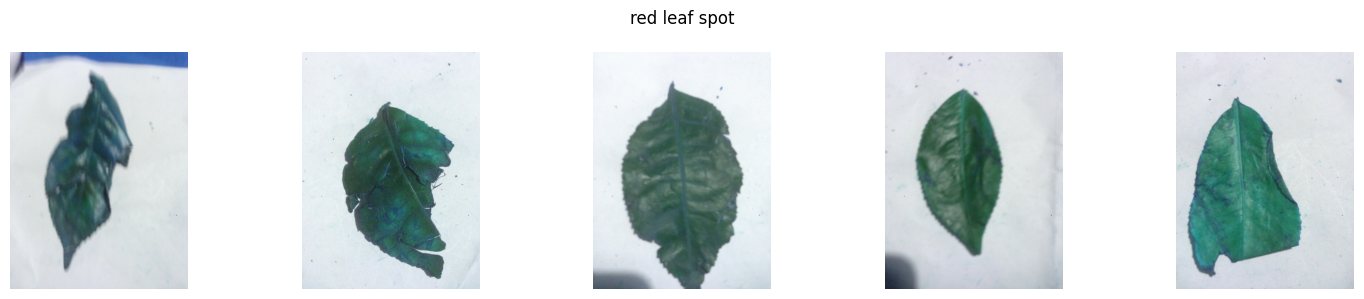

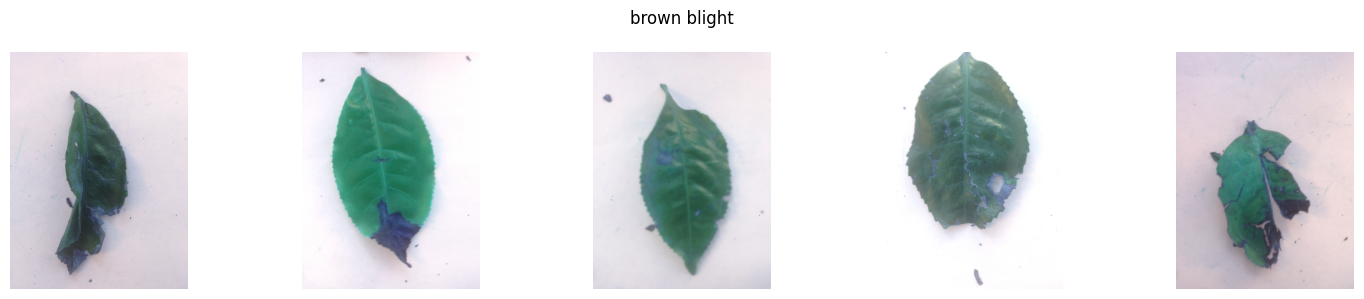

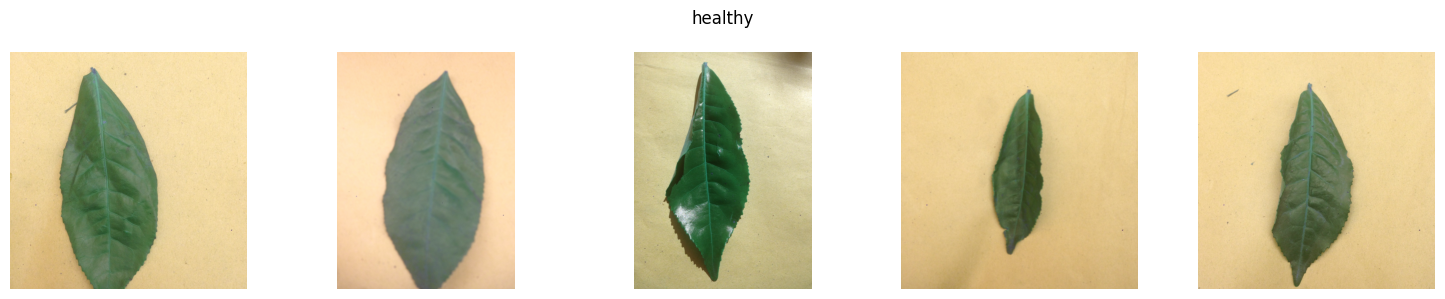

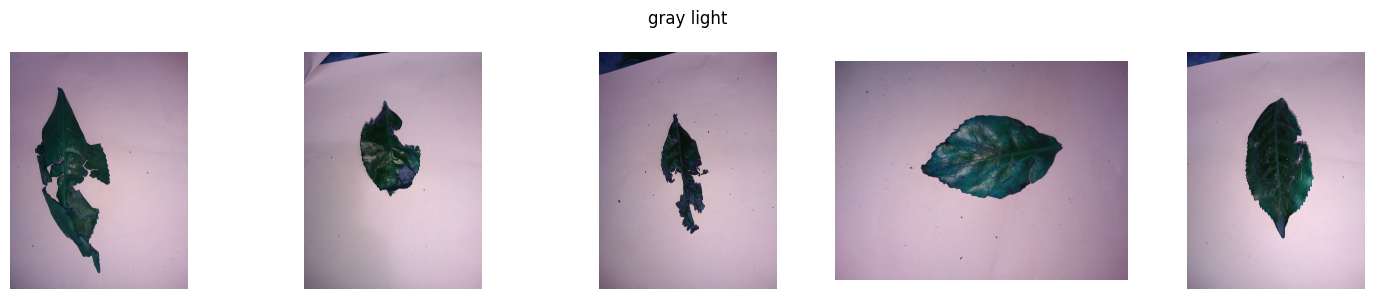

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

for cpath in os.listdir(fpath):
  cpath = os.path.join(fpath, cpath)

  img_paths = [os.path.join(cpath, imgpath) for imgpath in os.listdir(cpath)]

  # Creating a 1x5 grid of subplots
  fig, axs = plt.subplots(1, 5, figsize=(15, 3))

  # Display the first 5 images from each class
  for i, img_path in enumerate(img_paths[:5]):
    img = cv2.imread(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')

  # Add a title for clarity
  fig.suptitle(os.path.basename(cpath))

  # Show the plot
  plt.tight_layout()
  plt.show()


# Displaying Total number of images in the dataset

In [ ]:
total_images = 0
for cpath in os.listdir(fpath):
    cpath = os.path.join(fpath, cpath)

    for imgpath in os.listdir(cpath):
        # Increment the total image count
        total_images = total_images + 1

In [ ]:
print(total_images)

885


In [ ]:
target_folder = 'Anthracnose'
anthfolder = os.path.join(fpath,target_folder)
len(os.listdir(anthfolder))

100

In [ ]:
target_folders = ['Anthracnose','algal leaf','bird eye spot','brown blight','gray light','healthy','red leaf spot','white spot']

for folder in target_folders:
  currFolder = os.path.join(fpath,folder)
  print("Number of images in",folder,"is : ",len(os.listdir(currFolder)))

Number of images in Anthracnose is :  100
Number of images in algal leaf is :  113
Number of images in bird eye spot is :  100
Number of images in brown blight is :  113
Number of images in gray light is :  100
Number of images in healthy is :  74
Number of images in red leaf spot is :  143
Number of images in white spot is :  142
